# INFO7374 Algorithmic Digital Marketing Fall 2021, Northeastern University

## Project: Global Superstore Marketing Analytics

### Team 3: Sushmitha Jogula - 001546751 and Shreya Bhosale - 001584541

## About the Project

Global Superstore is a leading and one of the largest ecommerce marketplaces connecting businesses across several channels without any hassle. It is considered as one of the best places to advertise, market, purchase and sell goods/properties to genuine individuals. We intend to analyze the sales data of Global Superstore and generate insights about their customers and their behavior based on several factors such as their purchase history, frequency of specific items in their order history, location, shopping price range, payment type etc. This information can be used by the marketing team of Global Superstore to make data-driven decisions generating better profits and revenues to identify best, average and worst customers and the company can create promotional campaigns to attract and retain the customers, to provide product recommendations to customers based on their order history, predict future sales etc.

## Cohort Analysis and RFM Customer Segmentation

Cohort Analysis is a very useful and relatively simple technique that helps in getting valuable insights about the behavior of any business’ customers/users based on the customer cohorts. 

RFM analysis is a data-driven customer behavior segmentation technique where RFM stands for Recency, Frequency, and Monetary Value.

We'll learn more about these concepts as we go further. 

### importing the required libraries 

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors
import squarify
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### loading the dataframe from csv

In [58]:
orders_final_df = pd.read_csv("cleaned_orders_dataset.csv")
orders_final_df

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,seller_zip_code,seller_city,seller_state,product_category_name_english,customer_id,...,customer_unique_id,customer_zip_code,customer_city,customer_state,customer_age,customer_income,customer_marital_status,order_year,order_month,order_weekday
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,cool_stuff,3ce436f183e68e07877b285a838db11a,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,77,7208,0,2017,9,Wednesday
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,...,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15,6142,1,2017,4,Wednesday
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,...,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,64,24244,1,2018,1,Sunday
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,14403,franca,SP,perfumery,d4eb9395c8c0431ee92fce09860c5a06,...,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,56,23541,0,2018,8,Wednesday
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,...,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,59,29817,0,2017,2,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112642,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,housewares,b51593916b4b8e0d6f66f2ae24f2673d,...,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,35,22497,0,2018,4,Monday
112643,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1206,sao paulo,SP,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,...,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,36,27170,1,2018,7,Saturday
112644,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,80610,curitiba,PR,sports_leisure,29309aa813182aaddc9b259e31b870e6,...,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,61,37357,1,2017,10,Monday
112645,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,4733,sao paulo,SP,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,...,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,67,3786,0,2017,8,Monday


In [59]:
orders_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112647 entries, 0 to 112646
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     112647 non-null  int64  
 1   order_id                       112647 non-null  object 
 2   order_item_id                  112647 non-null  int64  
 3   product_id                     112647 non-null  object 
 4   seller_id                      112647 non-null  object 
 5   seller_zip_code                112647 non-null  int64  
 6   seller_city                    112647 non-null  object 
 7   seller_state                   112647 non-null  object 
 8   product_category_name_english  112647 non-null  object 
 9   customer_id                    112647 non-null  object 
 10  order_status                   112647 non-null  object 
 11  order_date                     112647 non-null  object 
 12  order_delivery_date           

In [60]:
#converting order_date column to datetime

orders_final_df['order_date']= pd.to_datetime(orders_final_df['order_date'])
orders_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112647 entries, 0 to 112646
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     112647 non-null  int64         
 1   order_id                       112647 non-null  object        
 2   order_item_id                  112647 non-null  int64         
 3   product_id                     112647 non-null  object        
 4   seller_id                      112647 non-null  object        
 5   seller_zip_code                112647 non-null  int64         
 6   seller_city                    112647 non-null  object        
 7   seller_state                   112647 non-null  object        
 8   product_category_name_english  112647 non-null  object        
 9   customer_id                    112647 non-null  object        
 10  order_status                   112647 non-null  object        
 11  

## Cohort Analysis

Cohort Analysis is a descriptive analytics technique in cohort analysis. Customers are divided into mutually exclusive cohorts, which are then tracked over time. A cohort is a collection of users who have something in common such as signing up for a product or service during a particular time frame or purchasing a specific product or subscribing to a service or having the same first purchase month. This analysis aids in the deeper interpretation of high-level patterns by supplying metrics around the product and consumer lifecycle. 

When building a cohort analysis, it’s important to consider the relationship between the event or interaction you’re tracking and its relationship to your business model.

Here, we will be determining the user's cohort group (based on their first order. We are adding a new column here called cohort, which is the year and month in which the user's first purchase was made.

In [61]:
orders_final_df1 = pd.read_csv('/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/ADM/cleaned_orders_dataset1.csv')
orders_final_df1

,order_id,order_item_id,product_id,seller_id,payment_type,total_payment,product_category_name_english,seller_zip_code,seller_city,seller_state,...,customer_zip_code,customer_city,customer_state,customer_unique_id,order_year,order_month,order_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Credit Card,72.19,Cool Stuff,27277,Volta Redonda,SP,...,28013,Campos Dos Goytacazes,RJ,5ee8fe956c2631afc0a1dcc1920d0e3d,2017,9,2,8,Wed,Sep
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Boleto,73.86,Cool Stuff,27277,Volta Redonda,SP,...,75800,Jatai,GO,8b3f917f4307d3e5cf34c0b43d6e6f50,2017,6,2,11,Wed,Jun
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Credit Card,83.23,Cool Stuff,27277,Volta Redonda,SP,...,30720,Belo Horizonte,MG,69ba88e17ea574da9c9b8c8834a583d1,2018,5,4,10,Fri,May
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Credit Card,75.07,Cool Stuff,27277,Volta Redonda,SP,...,83070,Sao Jose Dos Pinhais,PR,cbe063493a222cb17024ff0285b4ecb6,2017,8,1,18,Tue,Aug
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Credit Card,72.19,Cool Stuff,27277,Volta Redonda,SP,...,36400,Conselheiro Lafaiete,MG,ffab5330bd7b40979ab6726b2e02292e,2017,8,3,21,Thu,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,Boleto,136.04,Furniture Decor,80220,Curitiba,PR,...,22793,Rio De Janeiro,RJ,e060eb8f37de232154b24bbb2413b68e,2017,4,2,10,Wed,Apr
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,Boleto,225.21,Electronics,82620,Curitiba,PR,...,13485,Limeira,SP,3041f5d65c4fa516eed1325d7a8657af,2017,8,4,10,Fri,Aug
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,Boleto,6922.21,Computers,86026,Londrina,PR,...,29066,Vitoria,ES,57b628f46c00f9a7358e5e875d5b4dd0,2018,7,2,18,Wed,Jul
116579,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,Credit Card,84.68,Drinks,3124,Sao Paulo,SP,...,12280,Cacapava,SP,ea4d52b176423e61a84052b0f4717be9,2018,4,3,19,Thu,Apr


In [62]:
n_orders = orders_final_df1.groupby(['customer_unique_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / orders_final_df1['customer_unique_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.21% of customers ordered more than once.


/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


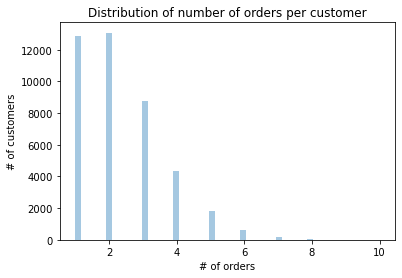

In [63]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [64]:
orders_final_df1 = orders_final_df1[orders_final_df1['order_year']!=2016]
df = orders_final_df1[['customer_unique_id', 'order_id', 'order_date','product_category_name_english', 'customer_state']].drop_duplicates()
df['order_date']= pd.to_datetime(df['order_date'])
df['month_of_order'] = df['order_date'].dt.to_period('M')
df['cohort'] = df.groupby('customer_unique_id')['order_date'] \
                 .transform('min') \
                 .dt.to_period('M') 
df

,customer_unique_id,order_id,order_date,product_category_name_english,customer_state,month_of_order,cohort
0,5ee8fe956c2631afc0a1dcc1920d0e3d,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:00,Cool Stuff,RJ,2017-09,2017-09
1,8b3f917f4307d3e5cf34c0b43d6e6f50,130898c0987d1801452a8ed92a670612,2017-06-28 11:52:00,Cool Stuff,GO,2017-06,2017-06
2,69ba88e17ea574da9c9b8c8834a583d1,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18 10:25:00,Cool Stuff,MG,2018-05,2017-10
3,cbe063493a222cb17024ff0285b4ecb6,6f8c31653edb8c83e1a739408b5ff750,2017-01-08 18:38:00,Cool Stuff,PR,2017-01,2017-01
4,ffab5330bd7b40979ab6726b2e02292e,7d19f4ef4d04461989632411b7e588b9,2017-10-08 21:48:00,Cool Stuff,MG,2017-10,2017-07
...,...,...,...,...,...,...,...
116574,a50a18d0f932c1cf1dec68cc1d281d8a,fd607d0a02cb276bc764a15f80f0423f,2018-07-26 09:13:00,Furniture Decor,BA,2018-07,2018-04
116576,e060eb8f37de232154b24bbb2413b68e,fdaf98feac227eb978d8f33f36e0231d,2017-04-19 10:20:00,Furniture Decor,RJ,2017-04,2017-04
116577,3041f5d65c4fa516eed1325d7a8657af,fe68b52db13993f58175fa589125d345,2017-11-08 10:15:00,Electronics,SP,2017-11,2017-01
116578,57b628f46c00f9a7358e5e875d5b4dd0,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:00,Computers,ES,2018-07,2017-01


In [65]:
cohort_df = df.groupby(['cohort', 'month_of_order']).agg(n_customers=('customer_unique_id', 'count')).reset_index(drop=False)
cohort_df['period_number'] = (cohort_df.month_of_order - cohort_df.cohort).apply(attrgetter('n'))

def get_data(df_cohort):
    cohort_pivot = cohort_df.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
    cohort_pivot = cohort_pivot.iloc[4:-1,:-5]
    return cohort_pivot

cohort_pivot_ = get_data(cohort_df)
cohort_pivot_

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
cohort,,,,,,,,,,,,,,,,,,,
2017-05,3017.0,228.0,215.0,242.0,243.0,272.0,425.0,238.0,341.0,370.0,357.0,366.0,326.0,335.0,359.0,284.0,110.0,94.0,107.0
2017-06,2423.0,201.0,185.0,212.0,225.0,377.0,210.0,312.0,259.0,295.0,289.0,264.0,268.0,300.0,260.0,69.0,89.0,82.0,90.0
2017-07,2719.0,216.0,215.0,208.0,357.0,219.0,308.0,340.0,371.0,308.0,308.0,289.0,366.0,261.0,85.0,91.0,94.0,96.0,NaN
2017-08,2582.0,194.0,226.0,317.0,197.0,333.0,307.0,307.0,303.0,303.0,287.0,292.0,217.0,90.0,85.0,83.0,81.0,NaN,NaN
2017-09,2330.0,193.0,332.0,193.0,301.0,302.0,267.0,270.0,249.0,261.0,306.0,210.0,81.0,79.0,96.0,69.0,NaN,NaN,NaN
2017-10,2268.0,313.0,175.0,286.0,256.0,243.0,267.0,232.0,245.0,280.0,230.0,93.0,78.0,80.0,70.0,NaN,NaN,NaN,NaN
2017-11,3635.0,300.0,410.0,432.0,420.0,384.0,333.0,366.0,389.0,361.0,142.0,100.0,117.0,124.0,NaN,NaN,NaN,NaN,NaN
2017-12,1813.0,211.0,197.0,246.0,237.0,190.0,194.0,239.0,176.0,75.0,56.0,66.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,2515.0,279.0,327.0,316.0,270.0,265.0,313.0,253.0,78.0,84.0,100.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
cohort_size = cohort_pivot_.iloc[:,0]
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
cohort,,,,,,,,,,,,,,,,,,,
2017-05,1.0,0.075572,0.071263,0.080212,0.080544,0.090156,0.140868,0.078886,0.113026,0.122638,0.118329,0.121313,0.108054,0.111037,0.118992,0.094133,0.036460,0.031157,0.035466
2017-06,1.0,0.082955,0.076352,0.087495,0.092860,0.155592,0.086669,0.128766,0.106892,0.121750,0.119274,0.108956,0.110607,0.123813,0.107305,0.028477,0.036731,0.033842,0.037144
2017-07,1.0,0.079441,0.079073,0.076499,0.131298,0.080544,0.113277,0.125046,0.136447,0.113277,0.113277,0.106289,0.134608,0.095991,0.031261,0.033468,0.034572,0.035307,NaN
2017-08,1.0,0.075136,0.087529,0.122773,0.076297,0.128970,0.118900,0.118900,0.117351,0.117351,0.111154,0.113091,0.084043,0.034857,0.032920,0.032146,0.031371,NaN,NaN
2017-09,1.0,0.082833,0.142489,0.082833,0.129185,0.129614,0.114592,0.115880,0.106867,0.112017,0.131330,0.090129,0.034764,0.033906,0.041202,0.029614,NaN,NaN,NaN
2017-10,1.0,0.138007,0.077160,0.126102,0.112875,0.107143,0.117725,0.102293,0.108025,0.123457,0.101411,0.041005,0.034392,0.035273,0.030864,NaN,NaN,NaN,NaN
2017-11,1.0,0.082531,0.112792,0.118845,0.115543,0.105640,0.091609,0.100688,0.107015,0.099312,0.039065,0.027510,0.032187,0.034113,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.116382,0.108660,0.135687,0.130723,0.104799,0.107005,0.131826,0.097077,0.041368,0.030888,0.036404,0.038058,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.110934,0.130020,0.125646,0.107356,0.105368,0.124453,0.100596,0.031014,0.033400,0.039761,0.038171,NaN,NaN,NaN,NaN,NaN,NaN,NaN


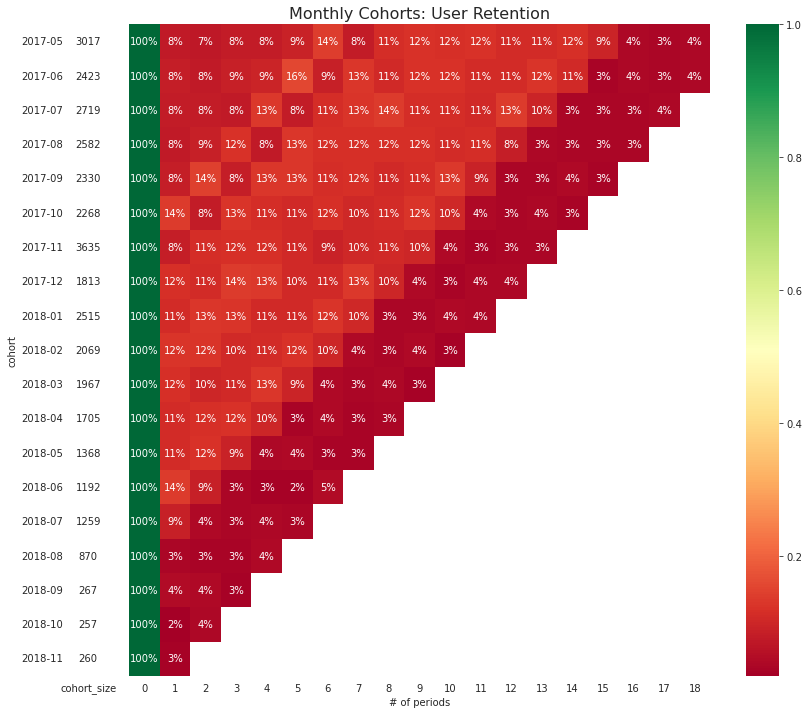

In [67]:
#Plotting the user retention matrix

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 10), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

## RFM Customer Segmentation

RFM Analysis is a data-driven customer behavior segmentation technique which enables personalized marketing, increases engagement, and allows you to create specific, relevant offers to the right groups of customers. Here, RFM stands for Recency, Frequency, and Monetary Value. Here, the idea is to segment customers based on when their last purchase was i.e. Recency, how often they’ve purchased in the past i.e. Frequency, and how much they spent i.e. Monetary. All of these measures have proven to be effective predictors of a customer’s willingness to engage in marketing messages and offers.

In [68]:
#create a new customer dataframe with all the unique customer_ids

tx_customer = pd.DataFrame(orders_final_df['customer_unique_id'].unique())
tx_customer.columns = ['customer_id']
tx_customer

,customer_id
0,871766c5855e863f6eccc05f988b23cb
1,eb28e67c4c0b83846050ddfb8a35d051
2,3818d81c6709e39d06b2738a8d3a2474
3,af861d436cfc08b2c2ddefd0ba074622
4,64b576fb70d441e8f1b2d7d446e483c5
...,...
95414,0c9aeda10a71f369396d0c04dce13a64
95415,0da9fe112eae0c74d3ba1fe16de0988b
95416,cd79b407828f02fdbba457111c38e4c4
95417,eb803377c9315b564bdedad672039306


In [69]:
# finding the maximum purchase i.e. most recent purchase date for every customer

tx_max_purchase_date = orders_final_df.groupby('customer_unique_id').order_date.max().reset_index()
tx_max_purchase_date.columns = ['customer_id','MaxOrderDate']
tx_max_purchase_date

,customer_id,MaxOrderDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95415,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95416,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95417,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [70]:
# Calculating the recency factor by subtracting the last purchase date from current date to get number of days 

tx_max_purchase_date['Recency'] = (tx_max_purchase_date['MaxOrderDate'].max() - tx_max_purchase_date['MaxOrderDate']).dt.days
tx_customer = pd.merge(tx_customer, tx_max_purchase_date[['customer_id','Recency']], on='customer_id')
tx_customer

,customer_id,Recency
0,871766c5855e863f6eccc05f988b23cb,355
1,eb28e67c4c0b83846050ddfb8a35d051,349
2,3818d81c6709e39d06b2738a8d3a2474,231
3,af861d436cfc08b2c2ddefd0ba074622,25
4,64b576fb70d441e8f1b2d7d446e483c5,575
...,...,...
95414,0c9aeda10a71f369396d0c04dce13a64,132
95415,0da9fe112eae0c74d3ba1fe16de0988b,50
95416,cd79b407828f02fdbba457111c38e4c4,314
95417,eb803377c9315b564bdedad672039306,384


In [71]:
#replacing 0 with 1

tx_customer["Recency"].replace({0:1}, inplace=True)

In [72]:
tx_customer

,customer_id,Recency
0,871766c5855e863f6eccc05f988b23cb,355
1,eb28e67c4c0b83846050ddfb8a35d051,349
2,3818d81c6709e39d06b2738a8d3a2474,231
3,af861d436cfc08b2c2ddefd0ba074622,25
4,64b576fb70d441e8f1b2d7d446e483c5,575
...,...,...
95414,0c9aeda10a71f369396d0c04dce13a64,132
95415,0da9fe112eae0c74d3ba1fe16de0988b,50
95416,cd79b407828f02fdbba457111c38e4c4,314
95417,eb803377c9315b564bdedad672039306,384


#### Recency, Frequency, and Monetary Value

- Recency: When was the most recent purchase date?
- Frequency: How many orders were purchased in the past?
- Monetary Value: How much total amount was spent on all orders?

In [73]:
rfm_df = tx_customer.groupby(['customer_id']).agg({
    'Recency' : 'max'
})
rfm_df['Frequency'] = orders_final_df.groupby(['customer_unique_id']).agg({
    'order_id': 'count'
})
rfm_df['Monetary Value'] = orders_final_df.groupby(['customer_unique_id']).agg({
    'total_payment': 'sum'
})
rfm_df

,Recency,Frequency,Monetary Value
customer_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54
0000f46a3911fa3c0805444483337064,541,1,198.31
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33
0004aac84e0df4da2b147fca70cf8255,292,1,452.85
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53
ffff371b4d645b6ecea244b27531430a,572,1,258.66


/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/U

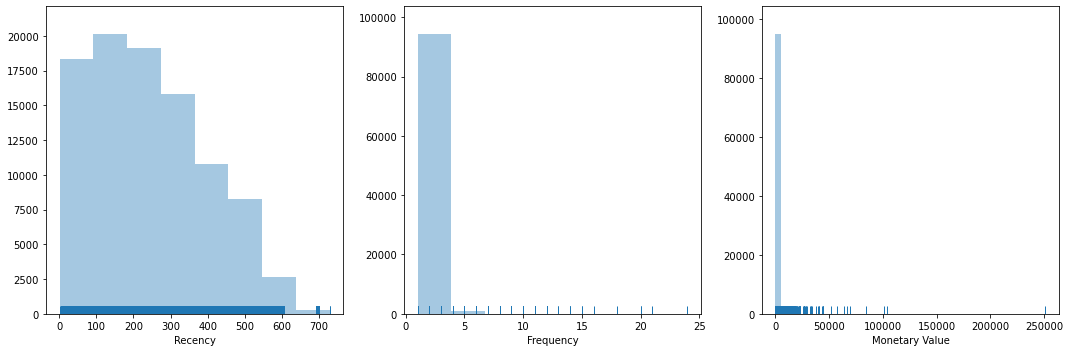

In [74]:
#Visualizing Recency, Frequency, Monetary Value

fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(rfm_df.Recency,bins=8,kde=False,rug=True, ax=ax[0])
sns.distplot(rfm_df.Frequency,bins=8,kde=False,rug=True, ax=ax[1])
sns.distplot(rfm_df['Monetary Value'],kde=False,rug=True, ax=ax[2])
plt.tight_layout()
plt.show()

In [75]:
#Ranking customers based on Monetary Value

customers_rank = rfm_df
customers_rank['Rank'] = customers_rank['Monetary Value'].rank(ascending=0)
customers_rank

,Recency,Frequency,Monetary Value,Rank
customer_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37,37729.5
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54,93351.5
0000f46a3911fa3c0805444483337064,541,1,198.31,59083.5
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33,83869.0
0004aac84e0df4da2b147fca70cf8255,292,1,452.85,24734.5
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14,184.0
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53,59938.0
ffff371b4d645b6ecea244b27531430a,572,1,258.66,47994.0


In [76]:
#Sorting the rank values in ascending order to get the top ranked customers 

customers_rank.sort_values('Rank',ascending=True)

,Recency,Frequency,Monetary Value,Rank
customer_id,,,,
0a0a92112bd4c708ca5fde585afaa872,338,8,251419.04,1.0
698e1cf81d01a3d389d96145f7fa6df8,375,20,104088.80,2.0
c402f431464c72e27330a67f7b94d4fb,192,20,101310.40,3.0
4007669dec559734d6f53e029e360987,282,6,83925.24,4.0
ef8d54b3797ea4db1d63f0ced6a906e9,136,10,69427.80,5.0
...,...,...,...,...
2878e5b88167faab17d4fb83a986d38b,308,1,26.75,95415.5
6f5b9d1cdccc4d28f0483a612edecacf,365,1,26.75,95415.5
b33336f46234b24a613ad9064d13106d,73,1,25.05,95417.0


#### RFM Quartiles

With customers now ranked in ascending order, we will divide them into quartiles, or 
three equal groups, for each RFM factor. The customers in the top quartile represent the best 
customers for each factor. 

In [77]:
rfm_quartiles = rfm_df.quantile(q=[0.25,0.5,0.75])
rfm_quartiles

,Recency,Frequency,Monetary Value,Rank
0.25,118.0,1.0,146.990,23855.75
0.50,223.0,1.0,260.250,47707.00
0.75,352.0,1.0,465.855,71563.00


In [78]:
##  RFM Segmentation ----

RFM_CustomerSegment = rfm_df.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
RFM_CustomerSegment['Quartile_R'] = RFM_CustomerSegment['Recency'].apply(R_Class, args=('Recency',rfm_quartiles,))
RFM_CustomerSegment['Quartile_F'] = RFM_CustomerSegment['Frequency'].apply(FM_Class, args=('Frequency',rfm_quartiles,))
RFM_CustomerSegment['Quartile_M'] = RFM_CustomerSegment['Monetary Value'].apply(FM_Class, args=('Monetary Value',rfm_quartiles,))
RFM_CustomerSegment['RFM_Class'] = RFM_CustomerSegment.Quartile_R.map(str) + RFM_CustomerSegment.Quartile_F.map(str) + RFM_CustomerSegment.Quartile_M.map(str)

RFM_CustomerSegment

,Recency,Frequency,Monetary Value,Rank,Quartile_R,Quartile_F,Quartile_M,RFM_Class
customer_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37,37729.5,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54,93351.5,4,1,1,411
0000f46a3911fa3c0805444483337064,541,1,198.31,59083.5,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33,83869.0,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,292,1,452.85,24734.5,2,1,3,213
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14,184.0,1,4,4,144
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53,59938.0,2,1,2,212
ffff371b4d645b6ecea244b27531430a,572,1,258.66,47994.0,1,1,2,112


In [79]:
#Computing RFM_Score as sum of Quartile_R, Quartile_F, Quartile_M

RFM_CustomerSegment['RFM_Score'] = RFM_CustomerSegment[['Quartile_R','Quartile_F','Quartile_M']].sum(axis=1)
RFM_CustomerSegment

,Recency,Frequency,Monetary Value,Rank,Quartile_R,Quartile_F,Quartile_M,RFM_Class,RFM_Score
customer_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37,37729.5,4,1,3,413,8
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54,93351.5,4,1,1,411,6
0000f46a3911fa3c0805444483337064,541,1,198.31,59083.5,1,1,2,112,4
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33,83869.0,2,1,1,211,4
0004aac84e0df4da2b147fca70cf8255,292,1,452.85,24734.5,2,1,3,213,6
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14,184.0,1,4,4,144,9
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53,59938.0,2,1,2,212,5
ffff371b4d645b6ecea244b27531430a,572,1,258.66,47994.0,1,1,2,112,4


In [80]:
#converting RFM_Class column to int

RFM_CustomerSegment['RFM_Class'] = RFM_CustomerSegment['RFM_Class'].astype(int)

RFM_CustomerSegment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95419 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Recency         95419 non-null  int64  
 1   Frequency       95419 non-null  int64  
 2   Monetary Value  95419 non-null  float64
 3   Rank            95419 non-null  float64
 4   Quartile_R      95419 non-null  int64  
 5   Quartile_F      95419 non-null  int64  
 6   Quartile_M      95419 non-null  int64  
 7   RFM_Class       95419 non-null  int64  
 8   RFM_Score       95419 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.3+ MB


As part of our customer segmentation process, we will be dividing our customers into 7 segments. They are:
- Core Best Customers
- Premium Payers/ Whales
- Loyal Customers
- Regular Customers
- Slipping Customers
- Almost Lost Customers 
- Lost Customers 

In [81]:
def segment_customer(dataframe):
    if (dataframe['RFM_Class'] >= 444 or (dataframe['RFM_Score'] >= 9)) :
        return 'Core Best Customers'
    elif ((dataframe['RFM_Score'] >= 7) and (dataframe['Quartile_M'] == 4)):
        return 'Premium Payers/Whales'
    elif ((dataframe['RFM_Score'] >= 6) and (dataframe['Quartile_F'] >= 2) and (dataframe['Quartile_R'] >=2)):
        return 'Loyal Customers'
    elif ((dataframe['RFM_Class'] >= 220) or (dataframe['RFM_Score'] >= 6)):
        return 'Regular Customers'
    elif (((dataframe['RFM_Class'] >= 121) and (dataframe['Quartile_R'] == 1)) or dataframe['RFM_Score'] == 5):
        return 'Slipping Customers'
    elif ((dataframe['RFM_Score'] >= 4) and (dataframe['Quartile_R'] == 1)):
        return 'Almost Lost Customers'
    else:
        return 'Lost Customers'

In [82]:
RFM_CustomerSegment['Customer_Segment'] = RFM_CustomerSegment.apply(segment_customer, axis=1)
RFM_CustomerSegment

,Recency,Frequency,Monetary Value,Rank,Quartile_R,Quartile_F,Quartile_M,RFM_Class,RFM_Score,Customer_Segment
customer_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37,37729.5,4,1,3,413,8,Regular Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54,93351.5,4,1,1,411,6,Regular Customers
0000f46a3911fa3c0805444483337064,541,1,198.31,59083.5,1,1,2,112,4,Almost Lost Customers
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33,83869.0,2,1,1,211,4,Lost Customers
0004aac84e0df4da2b147fca70cf8255,292,1,452.85,24734.5,2,1,3,213,6,Regular Customers
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14,184.0,1,4,4,144,9,Core Best Customers
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53,59938.0,2,1,2,212,5,Slipping Customers
ffff371b4d645b6ecea244b27531430a,572,1,258.66,47994.0,1,1,2,112,4,Almost Lost Customers


In [83]:
RFM_agg = RFM_CustomerSegment.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary Value': ['mean', 'count'],
}).round(2)

RFM_agg

Recency Frequency Monetary Value       
                         mean      mean           mean  count
Customer_Segment                                             
Almost Lost Customers  452.51      1.00         196.34   5970
Core Best Customers    182.56      2.11        1431.01  14679
Lost Customers         371.81      1.00         101.07  11878
Loyal Customers        275.26      2.01         206.07    190
Premium Payers/Whales  226.86      1.00         965.88   7322
Regular Customers      171.43      1.02         299.90  44247
Slipping Customers     363.95      1.00         264.92  11133

In [84]:
rfm_level_ag = pd.DataFrame(RFM_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer_Segment Recency Frequency Monetary Value       
                            mean      mean           mean  count
0  Almost Lost Customers  452.51      1.00         196.34   5970
1    Core Best Customers  182.56      2.11        1431.01  14679
2         Lost Customers  371.81      1.00         101.07  11878
3        Loyal Customers  275.26      2.01         206.07    190
4  Premium Payers/Whales  226.86      1.00         965.88   7322
5      Regular Customers  171.43      1.02         299.90  44247
6     Slipping Customers  363.95      1.00         264.92  11133

In [25]:
RFM_CustomerSegment.to_csv("RFM_CustomerSegment.csv")

#### Visualizing customer segmentation clusters

##### Using Bar plot

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


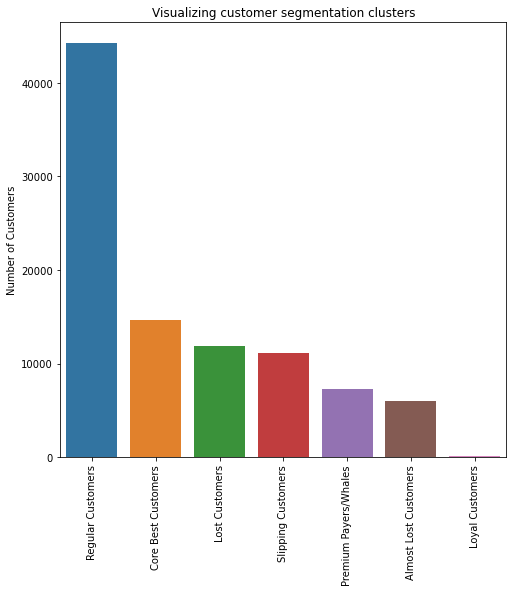

In [85]:
plt.figure(figsize=(8,8))
temp = RFM_CustomerSegment['Customer_Segment'].value_counts().sort_values(ascending=False)
sns.barplot(temp.index, temp.values)
plt.ylabel("Number of Customers")
plt.title("Visualizing customer segmentation clusters");
plt.xticks(rotation=90);

##### Using treemap 

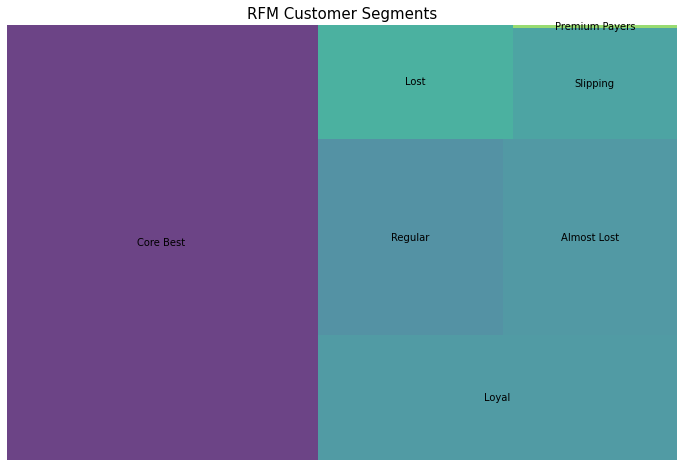

In [86]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes=RFM_CustomerSegment['Customer_Segment'].value_counts(), 
              label=['Core Best ',
                     'Loyal',
                     'Regular',
                     'Almost Lost',
                     'Lost', 
                     'Slipping', 'Premium Payers'], alpha=0.8 )
plt.title("RFM Customer Segments",fontsize=15)
plt.axis('off')
plt.show()

### Skewness Visualization and Analysis

In [87]:
#Visualizing Plots to analyse skewness of R, F, M values

def skewness_analysis(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(rfm_df[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

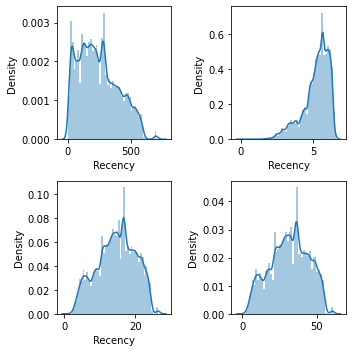

In [88]:
# Visualizing skewness of Recency

skewness_analysis('Recency')

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

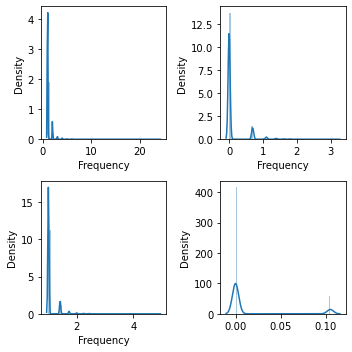

In [89]:
# Visualizing  skewness of Frequency
skewness_analysis('Frequency')

/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

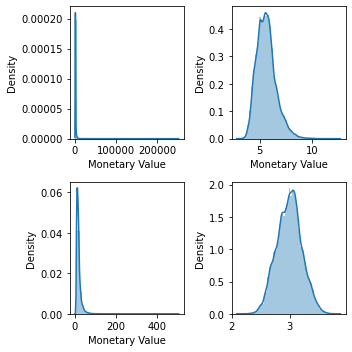

In [90]:
# Visualizing skewness of Monetary
skewness_analysis('Monetary Value')

### Applying the K-Means Clustering method now

In [91]:
rfm_data = RFM_CustomerSegment[['Recency', 'Frequency', 'Monetary Value']]
rfm_data

,Recency,Frequency,Monetary Value
customer_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,326.37
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,62.54
0000f46a3911fa3c0805444483337064,541,1,198.31
0000f6ccb0745a6a4b88665a16c9f078,325,1,100.33
0004aac84e0df4da2b147fca70cf8255,292,1,452.85
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,451,2,9510.14
fffea47cd6d3cc0a88bd621562a9d061,266,1,194.53
ffff371b4d645b6ecea244b27531430a,572,1,258.66


In [92]:
#Using SKLearn StandardScaler to center and scale our data 

log_data = np.log(rfm_data)
scaler = StandardScaler()
scaler.fit(log_data)
normalized_data = scaler.transform(log_data)
normalized_data = pd.DataFrame(data=normalized_data, index=rfm_data.index, columns=rfm_data.columns)

In [93]:
rfm_data_new = rfm_data.astype({'Recency':'int', 'Frequency':'int','Monetary Value':'int'})
rfm_data_new.to_csv("rfm_data_new.csv")

In [94]:
store_customers = pd.DataFrame()
store_customers["Recency"] =  stats.boxcox(rfm_data['Recency'])[0]
store_customers["Frequency"] = stats.boxcox(rfm_data['Frequency'])[0]
store_customers["Monetary Value"] = stats.boxcox(rfm_data['Monetary Value'])[0]
store_customers.head()

,Recency,Frequency,Monetary Value
0,21.894120,0.0,3.051600
1,22.224565,0.0,2.572836
2,52.651288,0.0,2.927517
3,39.613569,0.0,2.730617
4,37.298645,0.0,3.125115


In [53]:
store_customers.to_csv("store_customers.csv")

In [96]:
#Using SKLearn StandardScaler to center and scale our data 

scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(store_customers)
normalized_cust = scaler.transform(store_customers) 
# Assert that it has mean 0 and variance 1
print(normalized_cust.mean(axis = 0).round(2)) 
print(normalized_cust.std(axis = 0).round(2)) 

[ 0. -0. -0.]
[1. 1. 1.]


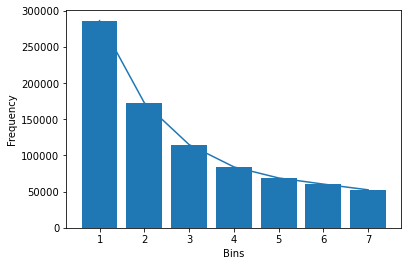

In [97]:
# Now Plotting Number of Clusters Against Within-Cluster Sum-of-Squared-Errors (SSE)

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(normalized_cust)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

x = list(sse.keys())
y = list(sse.values())

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x,y)
plt.show()

In [98]:
#Fitting our Data Set to K-Means

kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(normalized_cust)

KMeans(n_clusters=4, random_state=42)

In [99]:
store_customers["Cluster"] = kmeans_model.labels_
store_customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary Value':['mean', 'count']}).round(2)
store_customers

,Recency,Frequency,Monetary Value,Cluster
0,21.894120,0.000000,3.051600,0
1,22.224565,0.000000,2.572836,2
2,52.651288,0.000000,2.927517,2
3,39.613569,0.000000,2.730617,2
4,37.298645,0.000000,3.125115,3
...,...,...,...,...
95414,47.582368,0.105053,3.583469,1
95415,35.387910,0.000000,2.922405,2
95416,54.305126,0.000000,2.995617,3
95417,22.766769,0.000000,3.037562,0


The Cluster values in the above dataframe signify the following:

- Cluster 0 is our ideal customer segment. It has the highest Montary Value mean and lowest Recency mean and the highest frequency mean.
- Cluster 1 customers must be activated again by designing campaigns and promotions. Performs poorly across R, F, and M. 
- Cluster 2 customers shopped with Global Superstore recently but have not spend as much or as frequently as preferred; more personalized products can be targeted to maximize their lifetime-value.
- Cluster 3 customers have spent a fair amount with Global Superstore but has not shopped in the last few months; some action must be taken before they are lost. 

In [101]:
normalized_df = pd.DataFrame(normalized_cust, columns=['Recency', 'Frequency', 'Monetary Value'])
normalized_df['Id'] = store_customers.index
normalized_df['Cluster'] = kmeans_model.labels_
# Melt The Data
df_normalized_melt = pd.melt(normalized_df.reset_index(),
                      id_vars=['Id', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary Value'],
                      var_name='Attribute',
                      value_name='Value')
df_normalized_melt.head()

,Id,Cluster,Attribute,Value
0,0,0,Recency,-0.748438
1,1,2,Recency,-0.722689
2,2,2,Recency,1.648172
3,3,2,Recency,0.632269
4,4,3,Recency,0.451889


/Users/harooniqbal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Snake plot of normalized variables'}, xlabel='Attribute', ylabel='Value'>

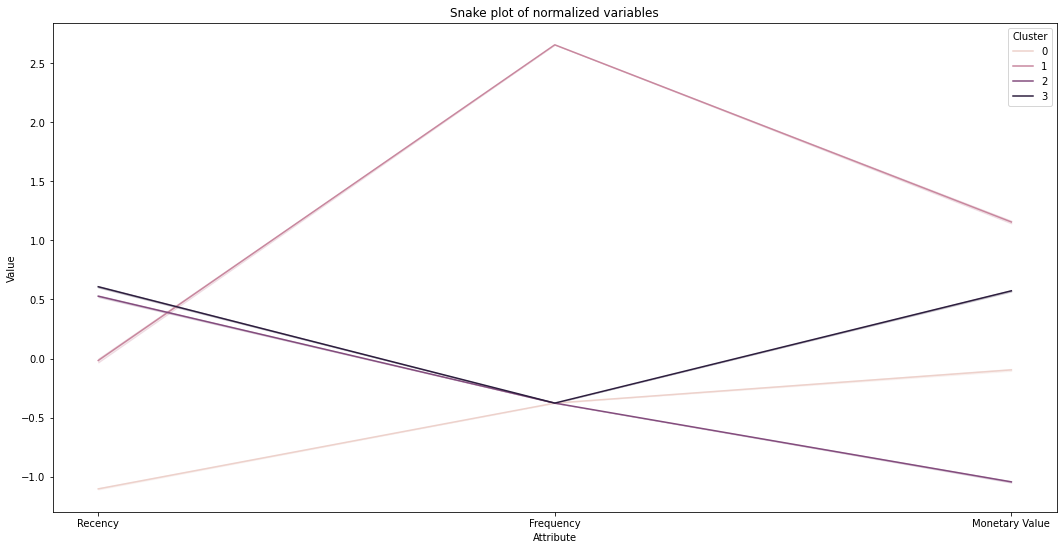

In [102]:
# Visualize using Snake plot
plt.figure(figsize = (18,9))
plt.title('Snake plot of normalized variables')
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_normalized_melt)

In [103]:
cust_cluster_avg = store_customers.groupby(['Cluster']).mean() 
cust_population_avg = store_customers.mean()
relative_imp = cust_cluster_avg / cust_population_avg - 1
relative_imp.round(2)

,Cluster,Frequency,Monetary Value,Recency
Cluster,,,,
0,NaN,-1.00,-0.01,-0.45
1,NaN,7.04,0.08,-0.01
2,NaN,-1.00,-0.07,0.21
3,NaN,-1.00,0.04,0.25


#### Relative importance of attributes

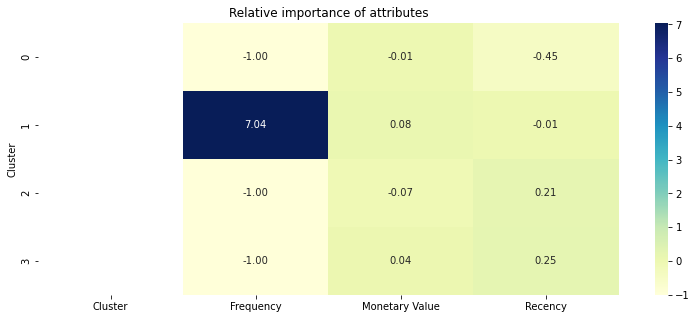

In [104]:
plt.figure(figsize=(13, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='YlGnBu')
plt.show()

The heatmap provides a simple and easy way to understand how our K-Means model place relative importance of our RFMT attributes to assign each customer to their respective segments.